#El Código de la Cocina
Vamos a ver cómo se cocinan estos modelos en Python con la popular librería scikit-learn.

In [ ]:
# Importamos las herramientas que necesitamos
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Creamos datos sintéticos: 100 casas (muestras) con 10 características (ingredientes)
X, y = make_regression(n_samples=100, n_features=10, noise=15, random_state=42)

# Dividimos los datos para entrenar y para probar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -- Modelo Ridge (el chef equilibrado) --
# alpha es el nivel de "penalización". Más alto = más estricto.
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# -- Modelo Lasso (el chef minimalista) --
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Imprimimos la "influencia" (coeficientes) que cada modelo le dio a los ingredientes
print("--- Coeficientes de Ridge ---")
print(ridge_model.coef_)

print("\n--- Coeficientes de Lasso ---")
print(lasso_model.coef_)

--- Coeficientes de Ridge ---
[20.31740291 54.43010449  2.79970568 62.78276213 90.974422   68.1289907
 82.28216261  7.29528007  3.00175478 70.07443343]

--- Coeficientes de Lasso ---
[19.32881673 54.39863242  1.28516306 62.77658128 90.86748953 68.08330475
 82.13531373  6.09713491  2.03182365 70.08137905]


In [1]:
# Adaptamos el código para seleccionar solo una característica para la visualización
# Usaremos la primera columna de tus datos (índice 0) como ejemplo.
# Si tus datos no son X_train, y_train, asegúrate de que sean de tipo numpy.array o pandas.DataFrame

# Seleccionamos la primera característica de nuestros datos
# Los corchetes [:, 0] toman todas las filas (:) y solo la primera columna (0)
X_train_grafico = X_train[:, 0].reshape(-1, 1)
X_test_grafico = X_test[:, 0].reshape(-1, 1)

# Creamos un nuevo modelo SVR solo para la visualización
# Es importante entrenar un nuevo modelo con el subconjunto de datos
svr_model_grafico = SVR(kernel='linear', C=100, epsilon=0.1)
svr_model_grafico.fit(X_train_grafico, y_train)

# Creamos un rango de valores para X que abarque la característica seleccionada
x_range = np.linspace(min(X_train_grafico), max(X_train_grafico), 100).reshape(-1, 1)

# Hacemos predicciones con el nuevo modelo entrenado sobre este rango
y_pred_svr = svr_model_grafico.predict(x_range)

# --- A partir de aquí, el código del gráfico es el mismo que el anterior ---

# Configuramos el gráfico
plt.figure(figsize=(10, 6))

# Trazamos los puntos de datos de entrenamiento para la característica seleccionada
plt.scatter(X_train_grafico, y_train, color='blue', label='Datos de Entrenamiento')

# Trazamos los puntos de datos de prueba para la característica seleccionada
plt.scatter(X_test_grafico, y_test, color='green', marker='x', label='Datos de Prueba')

# Trazamos la línea de predicción del modelo SVR
plt.plot(x_range, y_pred_svr, color='red', label='Línea de Regresión SVR')

# Añadimos etiquetas y título al gráfico
plt.title('Regresión SVR: Relación entre la Característica Seleccionada y el Precio')
plt.xlabel('Característica (X)')
plt.ylabel('Precio (Y)')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'X_train' is not defined

#Plantando el Árbol con Código

In [ ]:
# Importamos nuestro constructor de árboles
from sklearn.tree import DecisionTreeRegressor

# Usamos los mismos datos que en el ejemplo anterior

# Creamos el modelo. `max_depth` limita el número de preguntas para evitar sobreajuste.
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)

# Entrenamos el árbol: aprende qué preguntas hacer y en qué orden
tree_model.fit(X_train, y_train)

# Hacemos una predicción para la primera casa de nuestro set de prueba
# (usamos .reshape(1, -1) porque el modelo espera recibir un grupo de casas, aunque solo le pasemos una)
una_casa_nueva = X_test[0].reshape(1, -1)
prediccion = tree_model.predict(una_casa_nueva)

print(f"El árbol predice un precio de: {prediccion[0]:.2f}")
print(f"El precio real era: {y_test[0]:.2f}")

El árbol predice un precio de: 145.11
El precio real era: 188.54


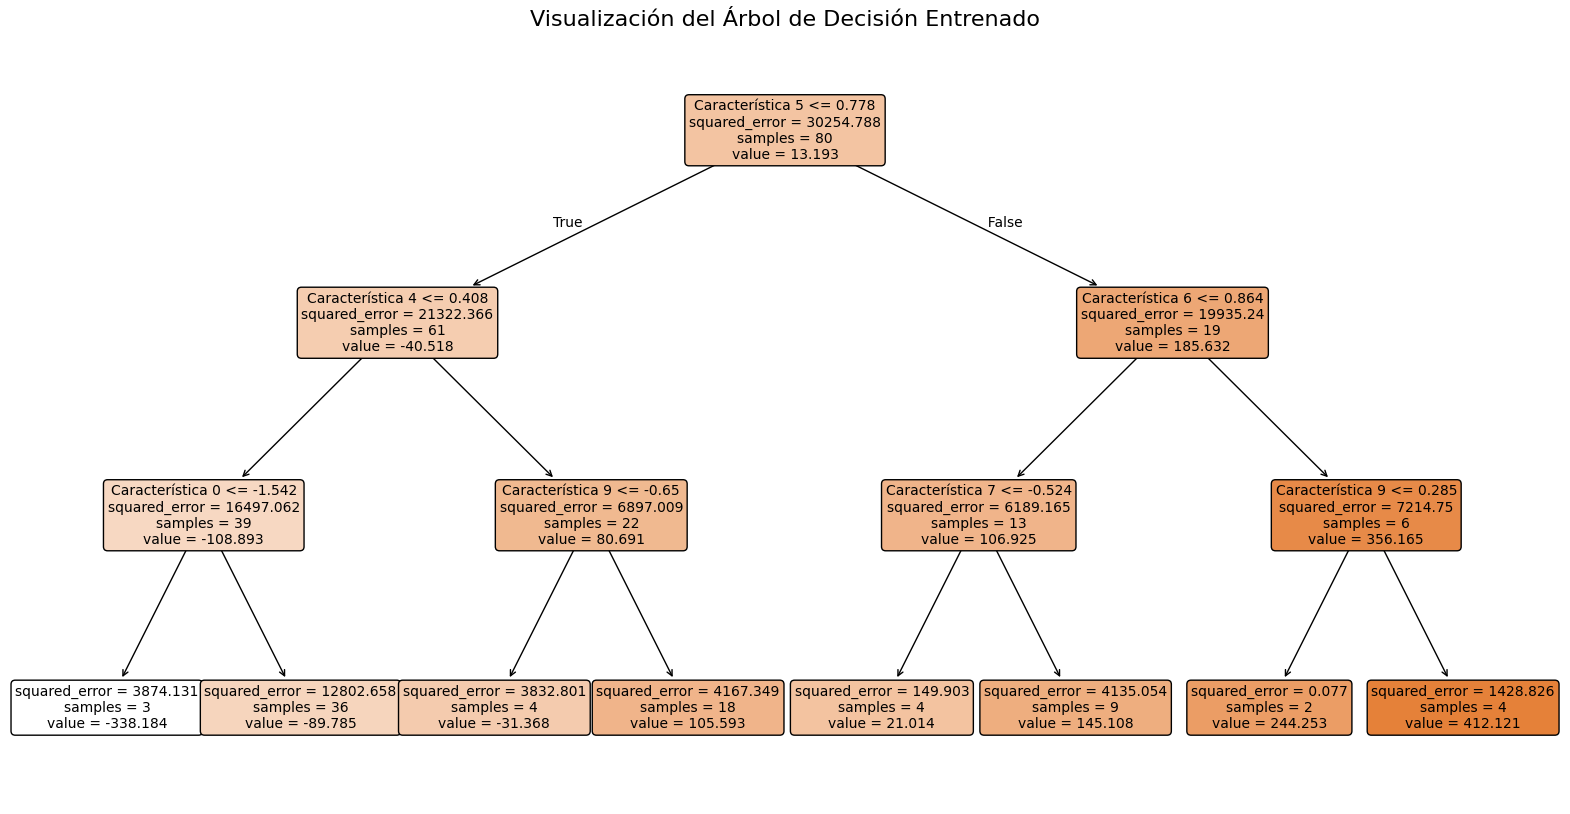

In [ ]:
# Importamos la función para graficar el árbol
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# A partir de aquí, asumimos que 'tree_model' ya ha sido entrenado.
# También asumimos que 'X_train' y 'y_train' están definidos.

# Si tienes los nombres de las características, puedes pasarlos a la función para un mejor entendimiento.
# Por ejemplo, si tus datos tienen nombres de columnas en un DataFrame:
# feature_names = list(tu_dataframe_original_de_X.columns)
# Si no, el modelo usará índices (X[0], X[1], etc.)
# Para este ejemplo, usaremos nombres genéricos.
feature_names = [f'Característica {i}' for i in range(X_train.shape[1])]

# Creamos una figura con un tamaño adecuado para visualizar el árbol completo
# El figsize depende de la complejidad de tu árbol (max_depth)
plt.figure(figsize=(20, 10))

# Trazamos el árbol de decisión
# - tree_model: El modelo de árbol que entrenamos
# - filled=True: Colorea los nodos según la clase/valor mayoritario
# - rounded=True: Hace que los bordes de los nodos sean redondos
# - feature_names: Proporciona los nombres de las características para que sean legibles en el gráfico
# - fontsize: Define el tamaño de la fuente para una mejor lectura
plot_tree(tree_model,
          filled=True,
          rounded=True,
          feature_names=feature_names,
          fontsize=10)

# Añadimos un título al gráfico
plt.title("Visualización del Árbol de Decisión Entrenado", fontsize=16)

# Mostramos el gráfico
plt.show()

#Construyendo la Autopista con Código

In [ ]:
# Importamos nuestro ingeniero de SVR
from sklearn.svm import SVR

# Usamos los mismos datos una vez más

# Creamos nuestro modelo SVR
# 'kernel' es el tipo de autopista (lineal, curva, etc.)
# 'epsilon' es la mitad del ancho de nuestra autopista (nuestro margen de error)
# 'C' es el "costo" de tener puntos fuera de la autopista. Un C alto obliga al modelo a ser más estricto.
svr_model = SVR(kernel='linear', C=100, epsilon=0.1)

# Entrenamos el modelo para que encuentre la mejor autopista
svr_model.fit(X_train, y_train)

# Hacemos una predicción para la misma casa de antes
una_casa_nueva = X_test[0].reshape(1, -1)
prediccion_svr = svr_model.predict(una_casa_nueva)

print(f"El SVR predice un precio de: {prediccion_svr[0]:.2f}")
print(f"El precio real era: {y_test[0]:.2f}")

El SVR predice un precio de: 201.07
El precio real era: 188.54


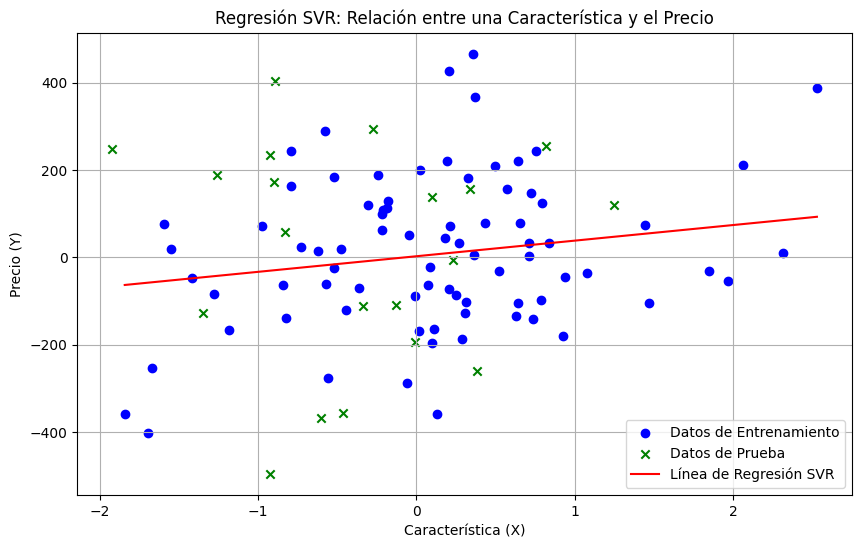

In [ ]:
# Importamos las librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR

# Asumimos que X_train, y_train, X_test y y_test ya están definidos y cargados.

# --- Paso 1: Seleccionar una sola característica para el gráfico ---
# Usamos la primera columna de tus datos (índice 0) como ejemplo para la visualización.
# Esto nos permite crear un gráfico 2D (una característica X vs. el precio Y).
X_train_grafico = X_train[:, 0].reshape(-1, 1)
X_test_grafico = X_test[:, 0].reshape(-1, 1)

# --- Paso 2: Crear y entrenar un nuevo modelo SVR para la visualización ---
# Es importante entrenar un nuevo modelo con el subconjunto de datos de una sola característica.
svr_model_grafico = SVR(kernel='linear', C=100, epsilon=0.1)
svr_model_grafico.fit(X_train_grafico, y_train)

# --- Paso 3: Generar la línea de predicción ---
# Creamos un rango de valores para X que abarque la característica seleccionada.
# Usamos np.linspace para generar 100 puntos espaciados uniformemente.
x_range = np.linspace(min(X_train_grafico), max(X_train_grafico), 100).reshape(-1, 1)

# Hacemos predicciones con el modelo recién entrenado sobre este nuevo rango de valores.
y_pred_svr = svr_model_grafico.predict(x_range)

# --- Paso 4: Trazar el gráfico ---
# Configuramos el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Trazamos los puntos de datos de entrenamiento (train data points)
plt.scatter(X_train_grafico, y_train, color='blue', label='Datos de Entrenamiento')

# Trazamos los puntos de datos de prueba (test data points)
plt.scatter(X_test_grafico, y_test, color='green', marker='x', label='Datos de Prueba')

# Trazamos la línea de predicción del modelo SVR (SVR regression line)
plt.plot(x_range, y_pred_svr, color='red', label='Línea de Regresión SVR')

# Añadimos etiquetas y un título al gráfico
plt.title('Regresión SVR: Relación entre una Característica y el Precio')
plt.xlabel('Característica (X)')
plt.ylabel('Precio (Y)')
plt.legend()  # Muestra la leyenda para identificar cada elemento
plt.grid(True) # Hace que la cuadrícula sea visible
plt.show()    # Muestra el gráfico